#ATSC 507 Assignment XI - Due Mar 24

In [1]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca' 

In [2]:
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
% matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def init():
    plt.cla(); ax1=fig.gca()
    ax1.plot(1, 1,linewidth=0)

#Read WRF output

In [5]:
filename=glob.glob('_data/wrfout_d01_2005-08-28.nc')[0]
d01_obj=nc.Dataset(filename)
filename=glob.glob('_data/wrfout_d02_2005-08-28.nc')[0]
d02_obj=nc.Dataset(filename)

List all variables for d01 and d02

In [6]:
print(d01_obj.variables.keys())

[u'time', u'DateTime', u'year', u'month', u'day', u'hour', u'minute', u'pressure', u'eta', u'p_top', u'lat', u'lon', u'Z_sfc', u'SST', u'T_sfc', u'p_sfc', u'slp', u'T_2m', u'theta_2m', u'Td_2m', u'r_v_2m', u'q_2m', u'rh_2m', u'u_10m_gr', u'v_10m_gr', u'u_10m_tr', u'v_10m_tr', u'ws_10m', u'wd_10m', u'precip_g', u'precip_c', u'pblh', u'nest_p', u'r_cloud', u'r_rain', u'Z_p', u'T_p', u'theta_p', u'Td_p', u'r_v_p', u'q_p', u'rh_p', u'u_tr_p', u'v_tr_p', u'ws_p', u'wd_p', u'w_p', u'pvo_p', u'avo_p', u'SW_d', u'LW_d', u'albedo', u'SH', u'LH', u'u_star', u'LWP', u'IWP', u'LandMask', u'LandUse', u'SeaIce']


In [7]:
print(d02_obj.variables.keys())

[u'time', u'DateTime', u'year', u'month', u'day', u'hour', u'minute', u'pressure', u'eta', u'p_top', u'lat', u'lon', u'Z_sfc', u'SST', u'T_sfc', u'p_sfc', u'slp', u'T_2m', u'theta_2m', u'Td_2m', u'r_v_2m', u'q_2m', u'rh_2m', u'u_10m_gr', u'v_10m_gr', u'u_10m_tr', u'v_10m_tr', u'ws_10m', u'wd_10m', u'precip_g', u'precip_c', u'pblh', u'nest_p', u'r_cloud', u'r_rain', u'Z_p', u'T_p', u'theta_p', u'Td_p', u'r_v_p', u'q_p', u'rh_p', u'u_tr_p', u'v_tr_p', u'ws_p', u'wd_p', u'w_p', u'pvo_p', u'avo_p', u'SW_d', u'LW_d', u'albedo', u'SH', u'LH', u'u_star', u'LWP', u'IWP', u'LandMask', u'LandUse', u'SeaIce']


In [8]:
latitude = d01_obj.variables['lat'][:]
longitude = d01_obj.variables['lon'][:]
lat02 = d02_obj.variables['lat'][:]
lon02 = d02_obj.variables['lon'][:]
plev = d01_obj.variables['pressure'][:]
time = ['2005-08-28 00:00:00', '2005-08-28 03:00:00', '2005-08-28 06:00:00', '2005-08-28 09:00:00', '2005-08-28 12:00:00']
time02 = ['2005-08-28 00:00:00', '2005-08-28 01:00:00', '2005-08-28 02:00:00', '2005-08-28 03:00:00', '2005-08-28 04:00:00', \
          '2005-08-28 05:00:00', '2005-08-28 06:00:00', '2005-08-28 07:00:00', '2005-08-28 08:00:00', '2005-08-28 09:00:00', \
          '2005-08-28 10:00:00', '2005-08-28 11:00:00', '2005-08-28 12:00:00']

Plot WRF domain.

In [9]:
latlim=[latitude.min()-4, latitude.max()+4]
lonlim=[longitude.min()-4, longitude.max()+4]
latlim2=[lat02.min()-1, lat02.max()+1]
lonlim2=[lon02.min()-2, lon02.max()+2]

In [10]:
mapkeys=dict(projection='merc',\
             llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
             urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
             resolution='l')
mapkeys02=dict(projection='merc',\
             llcrnrlon=lonlim2[0], llcrnrlat=latlim2[0],\
             urcrnrlon=lonlim2[1], urcrnrlat=latlim2[1],\
             resolution='i')
SIGN = 'Created by Yingkai (Kyle) Sha.\nFor ATSC-507 Assignment XI only.'

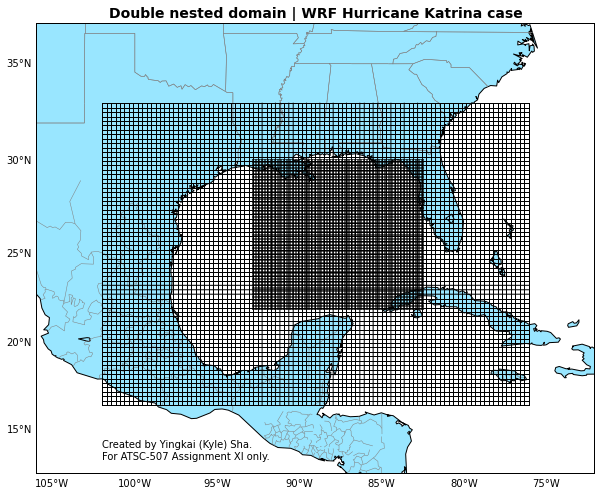

In [11]:
fig=plt.figure(figsize=(10, 10))
ax=fig.gca()
proj=Basemap(**mapkeys)
# draw coast line
proj.drawcoastlines(linewidth=1, color='k')
proj.fillcontinents(color=[0.6, 0.9, 1.0], lake_color=None, ax=ax, zorder=0, alpha=None)
proj.drawstates(color=[0.5, 0.5, 0.5], linewidth=0.5)
# draw parallels/meridians.
parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
# transfer from Lat/Lon to projected grid
x, y = proj(longitude, latitude)
x02, y02 = proj(lon02, lat02)
proj.plot(x, y, color='k', linewidth=1.0);
proj.plot(x.T, y.T, color='k', linewidth=1.0);
proj.plot(x02, y02, color='k', linewidth=0.6);
proj.plot(x02.T, y02.T, color='k', linewidth=0.6);
plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
ax.set_title('Double nested domain | WRF Hurricane Katrina case', fontweight='bold', fontsize=14)

#Movie I

* Sea-level pressure (as black contour lines, every 2 hPa between 980 and 1030 hPa, with base contour of 1000 hPa)
* Colour shaded horizontal wind speed
* black vectors (all of equal length) showing wind direction.

In [12]:
slp_lev = np.arange(980, 1030+2, 2)
spd_lim = [0, 100] # wind speed

In [13]:
# d01
SLP = d01_obj.variables['slp'][:]
u = d01_obj.variables['u_tr_p'][:][:, plev==925, :, :]
v = d01_obj.variables['v_tr_p'][:][:, plev==925, :, :]
SPEED = d01_obj.variables['ws_p'][:][:, plev==925, :, :]
u = u/np.sqrt(u**2+v**2); v = v/np.sqrt(u**2+v**2)
# d02
SLP02 = d02_obj.variables['slp'][:]
u02 = d02_obj.variables['u_tr_p'][:][:, plev==925, :, :]
v02 = d02_obj.variables['v_tr_p'][:][:, plev==925, :, :]
SPEED02 = d02_obj.variables['ws_p'][:][:, plev==925, :, :]
u02 = u02/np.sqrt(u02**2+v02**2); v02 = v02/np.sqrt(u02**2+v02**2)

In [14]:
SPEED.max()

67.772705

In [15]:
def view1_movie_d01(time_step):
    plt.cla()
    ax1=fig.gca()
    #
    proj=Basemap(**mapkeys);
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(longitude, latitude)
    CS1=proj.contour(x, y, SLP[time_step, :, :], slp_lev, colors = ('k',), linewidths=2.0)
    CS2=proj.pcolor(x, y, SPEED[time_step, 0, :, :], \
                    vmin=spd_lim[0], vmax=spd_lim[1], cmap=plt.cm.gist_ncar_r)
    Q=proj.quiver(x[::2, ::2], y[::2, ::2], \
                  u[time_step, 0, ::2, ::2], v[time_step, 0, ::2, ::2], scale=100, color=[0.1, 0.1, 0.1])
    CBar=proj.colorbar(CS2, location='right', size='5%', pad='2%')
    CBar.set_label('925hPa Wind speed (m/s)', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.clabel(CS1, slp_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.text(x[0, 0], y[0, 0]*0.7, 'Time: '+time[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    plt.title('SLP + 925hPa wind dir. + wind spd | d01 domain | WRF Hurricane Katrina case',\
                  fontweight='bold', fontsize=14)

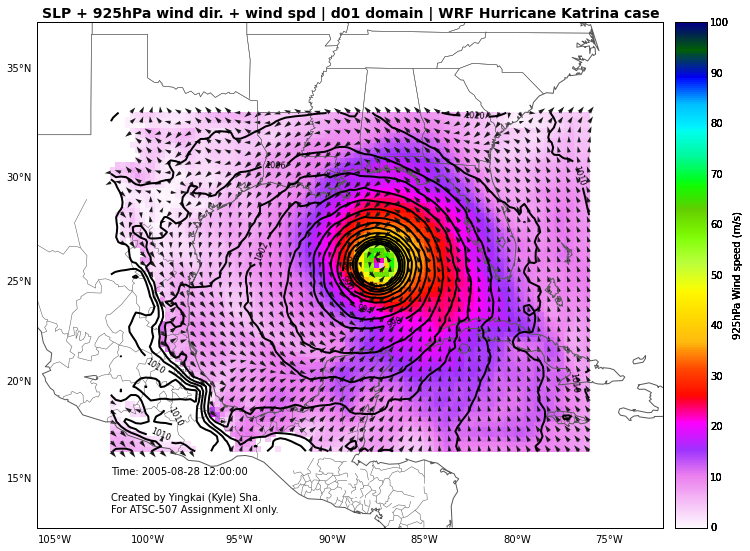

In [16]:
fig=plt.figure(figsize=(12, 12))
ani_obj=animation.FuncAnimation(fig, view1_movie_d01, range(5), init_func=init, interval=1000, blit=True)
#writer_obj=animation.FFMpegFileWriter()
ani_obj.save('Katrina1_d01.mov', metadata={'author':'Yingkai (Kyle) Sha'})

In [17]:
def view1_movie_d02(time_step):
    plt.cla()
    ax1=fig.gca()
    proj=Basemap(**mapkeys02)
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(lon02, lat02)
    CS1=proj.contour(x, y, SLP02[time_step, :, :], slp_lev, colors = ('k',), linewidths=2.0)
    CS2=proj.pcolor(x, y, SPEED02[time_step, 0, :, :], \
                    vmin=spd_lim[0], vmax=spd_lim[1], cmap=plt.cm.gist_ncar_r)
    Q=proj.quiver(x[::2, ::2], y[::2, ::2], \
                  u02[time_step, 0, ::2, ::2], v02[time_step, 0, ::2, ::2], scale=100, color=[0.1, 0.1, 0.1])
    CBar=proj.colorbar(CS2, location='right', size='5%', pad='2%')
    CBar.set_label('925hPa Wind speed (m/s)', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.clabel(CS1, slp_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.text(x[0, 0], y[0, 0]*0.6, 'Time: '+time02[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.1, SIGN, fontsize=10)
    plt.title('SLP + 925hPa wind dir. + wind spd | d02 domain | WRF Hurricane Katrina case',\
                  fontweight='bold', fontsize=14)

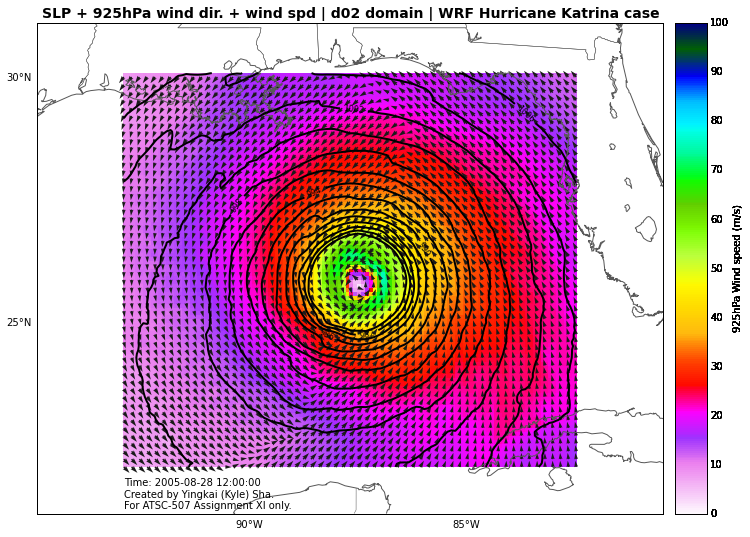

In [18]:
fig=plt.figure(figsize=(12, 12))
ani_obj=animation.FuncAnimation(fig, view1_movie_d02, range(13), init_func=init, interval=750, blit=True)
ani_obj.save('Katrina1_d02.mov', metadata={'author':'Yingkai (Kyle) Sha'})

#Movie II

* 250 hPa geopotential heights (as black contour lines)
* 500 hPa clouds (or relative humidity as a surrogate for clouds), colour shaded only for RH > 50%, and unshaded otherwise.

In [19]:
GPH_lev = np.arange(10750, 11100+50, 50)
rh_lev = np.arange(0, 100+10, 10)
rh_lev_shade = rh_lev[rh_lev>=50]
rh_lev=rh_lev[rh_lev<50]

In [20]:
# d01
GPH = d01_obj.variables['Z_p'][:][:, plev==250, :, :]
RH = d01_obj.variables['rh_p'][:][:, plev==500, :, :]
RH_shade = np.copy(RH); RH_shade[RH<=50]=np.nan
# d02
GPH02 = d02_obj.variables['Z_p'][:][:, plev==250, :, :]
RH02 = d02_obj.variables['rh_p'][:][:, plev==500, :, :]
RH_shade02 = np.copy(RH02); RH_shade02[RH02<=50]=np.nan

In [21]:
def view2_movie_d01(time_step):
    plt.cla()
    ax1=fig.gca()
    #
    proj=Basemap(**mapkeys); proj.ax = ax1
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(longitude, latitude)
    CS1=proj.contour(x, y, GPH[time_step, 0, :, :], GPH_lev, colors = ('k',), linewidths=3.5)
    CS2=proj.contour(x, y, RH[time_step, 0, :, :], rh_lev, colors = ('g',), linewidths=2.0)
    CS3=proj.contourf(x, y, RH_shade[time_step, 0, :, :], rh_lev_shade, cmap=plt.cm.BuGn)
    CBar=proj.colorbar(CS3, location='right', size='5%', pad='2%')
    CBar.set_label('500hPa Relative Humidity', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.clabel(CS1, GPH_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.clabel(CS2, rh_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.text(x[0, 0], y[0, 0]*0.7, 'Time: '+time[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax1.set_title('250hPa GPH + 500hPa RH | d01 domain | WRF Hurricane Katrina case', fontweight='bold', fontsize=14)

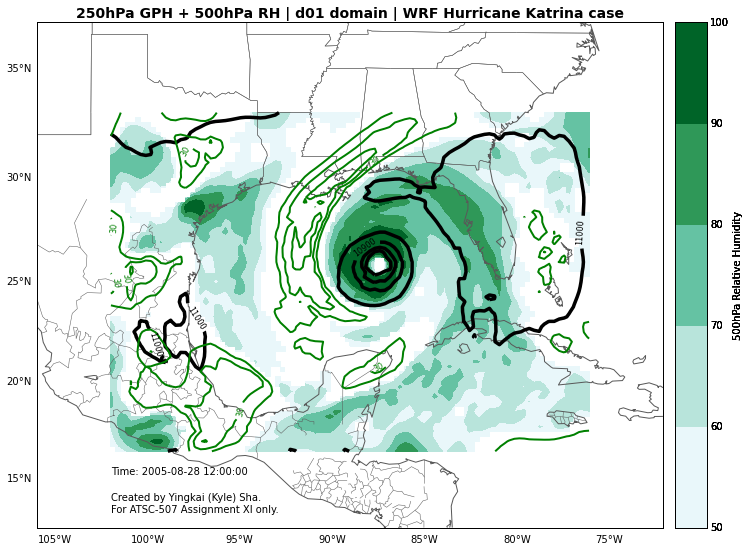

In [22]:
fig=plt.figure(figsize=(12, 12))
ani_obj=animation.FuncAnimation(fig, view2_movie_d01, range(5), init_func=init, interval=1000, blit=True)
ani_obj.save('Katrina2_d01.mov', metadata={'author':'Yingkai (Kyle) Sha'})

In [23]:
def view2_movie_d02(time_step):
    plt.cla()
    ax1=fig.gca()
    #
    proj=Basemap(**mapkeys02); proj.ax = ax1
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(lon02, lat02)
    CS1=proj.contour(x, y, GPH02[time_step, 0, :, :], GPH_lev, colors = ('k',), linewidths=3.5)
    CS2=proj.contour(x, y, RH02[time_step, 0, :, :], rh_lev, colors = ('g',), linewidths=2.0)
    #CS3=proj.pcolor(x, y, RH_shade[time_step, 0, :, :], vmin=50, vmax=100, cmap=plt.cm.BuGn)
    CS3=proj.contourf(x, y, RH_shade02[time_step, 0, :, :], rh_lev_shade, cmap=plt.cm.BuGn)
    CBar=proj.colorbar(CS3, location='right', size='5%', pad='2%')
    CBar.set_label('500hPa Relative Humidity', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.clabel(CS1, GPH_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.clabel(CS2, rh_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.text(x[0, 0], y[0, 0]*0.7, 'Time: '+time02[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax1.set_title('250hPa GPH + 500hPa RH | d02 domain | WRF Hurricane Katrina case', fontweight='bold', fontsize=14)

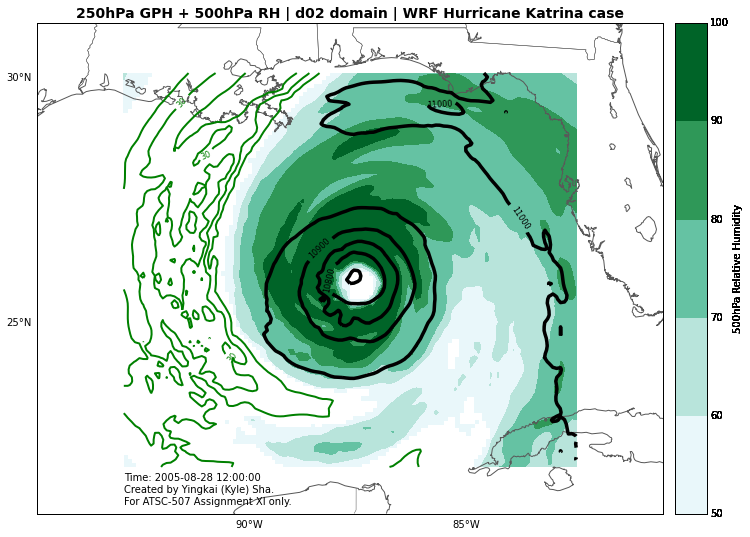

In [24]:
fig=plt.figure(figsize=(12, 12))
ani_obj=animation.FuncAnimation(fig, view2_movie_d02, range(13), init_func=init, interval=750, blit=True)
ani_obj.save('Katrina2_d02.mov', metadata={'author':'Yingkai (Kyle) Sha'})

# Movie III

I ploted upward latent heat flux ($\mathrm{W/m^2}$) to see the role of cumulus covection.

In [25]:
LH = d01_obj.variables['LH'][:]
LH02 = d02_obj.variables['LH'][:]

In [26]:
LH_lev = np.arange(-150, 1500+150, 150)

In [27]:
def view3_movie_d01(time_step):
    plt.cla()
    ax1=plt.gca()
    #
    proj=Basemap(**mapkeys); proj.ax = ax1
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(longitude, latitude)
    CS=proj.contourf(x, y, LH[time_step, :, :], LH_lev, cmap=plt.cm.Spectral_r, extend='both')
    proj.contour(x, y, LH[time_step, :, :], LH_lev, colors=('gray',), linewidth=1.0)
    CBar=proj.colorbar(CS)
    CBar.set_label('Latent Heat flux', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.text(x[0, 0], y[0, 0]*0.7, 'Time: '+time02[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax1.set_title('Latent heat flux | d01 domain | WRF Hurricane Katrina case', fontweight='bold', fontsize=12)

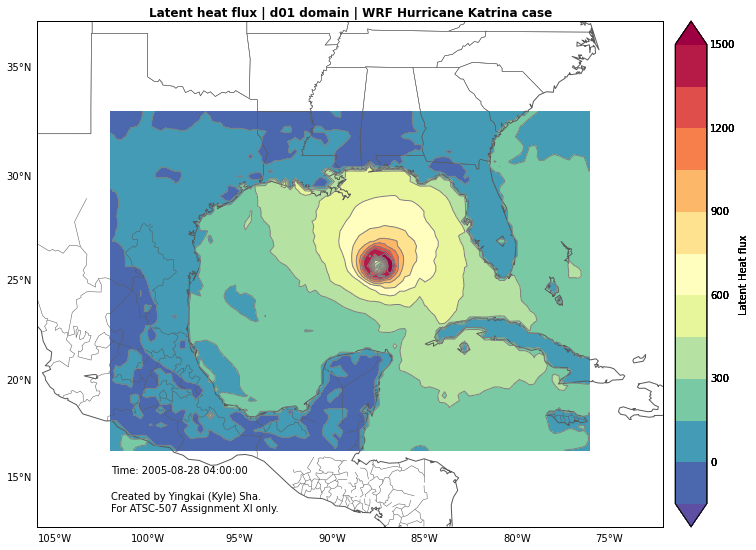

In [28]:
fig=plt.figure(figsize=(12, 12))
ani_obj=animation.FuncAnimation(fig, view3_movie_d01, range(5), init_func=init, interval=1000, blit=True)
ani_obj.save('Katrina3_d01.mov', metadata={'author':'Yingkai (Kyle) Sha'})

In [29]:
def view3_movie_d02(time_step):
    plt.cla()
    ax1=plt.gca()
    #
    proj=Basemap(**mapkeys02); proj.ax = ax1
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(lon02, lat02)
    CS=proj.contourf(x, y, LH02[time_step, :, :], LH_lev, cmap=plt.cm.Spectral_r, extend='both')
    proj.contour(x, y, LH02[time_step, :, :], LH_lev, colors=('gray',), linewidth=1.0)
    CBar=proj.colorbar(CS)
    CBar.set_label('Latent Heat flux', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.text(x[0, 0], y[0, 0]*0.7, 'Time: '+time02[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax1.set_title('Latent heat flux | d02 domain | WRF Hurricane Katrina case', fontweight='bold', fontsize=12)

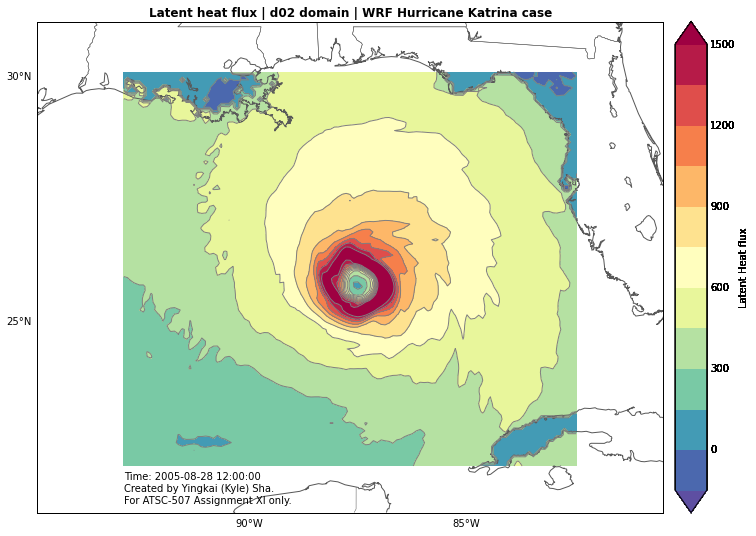

In [30]:
fig=plt.figure(figsize=(12, 12))
ani_obj=animation.FuncAnimation(fig, view3_movie_d02, range(13), init_func=init, interval=750, blit=True)
ani_obj.save('Katrina3_d02.mov', metadata={'author':'Yingkai (Kyle) Sha'})